# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_roc_curve, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('fivethirtyeight')

# Reading Data

In [2]:
df_smarket = pd.read_csv('Data/Smarket.csv')
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
df_smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


# EDA

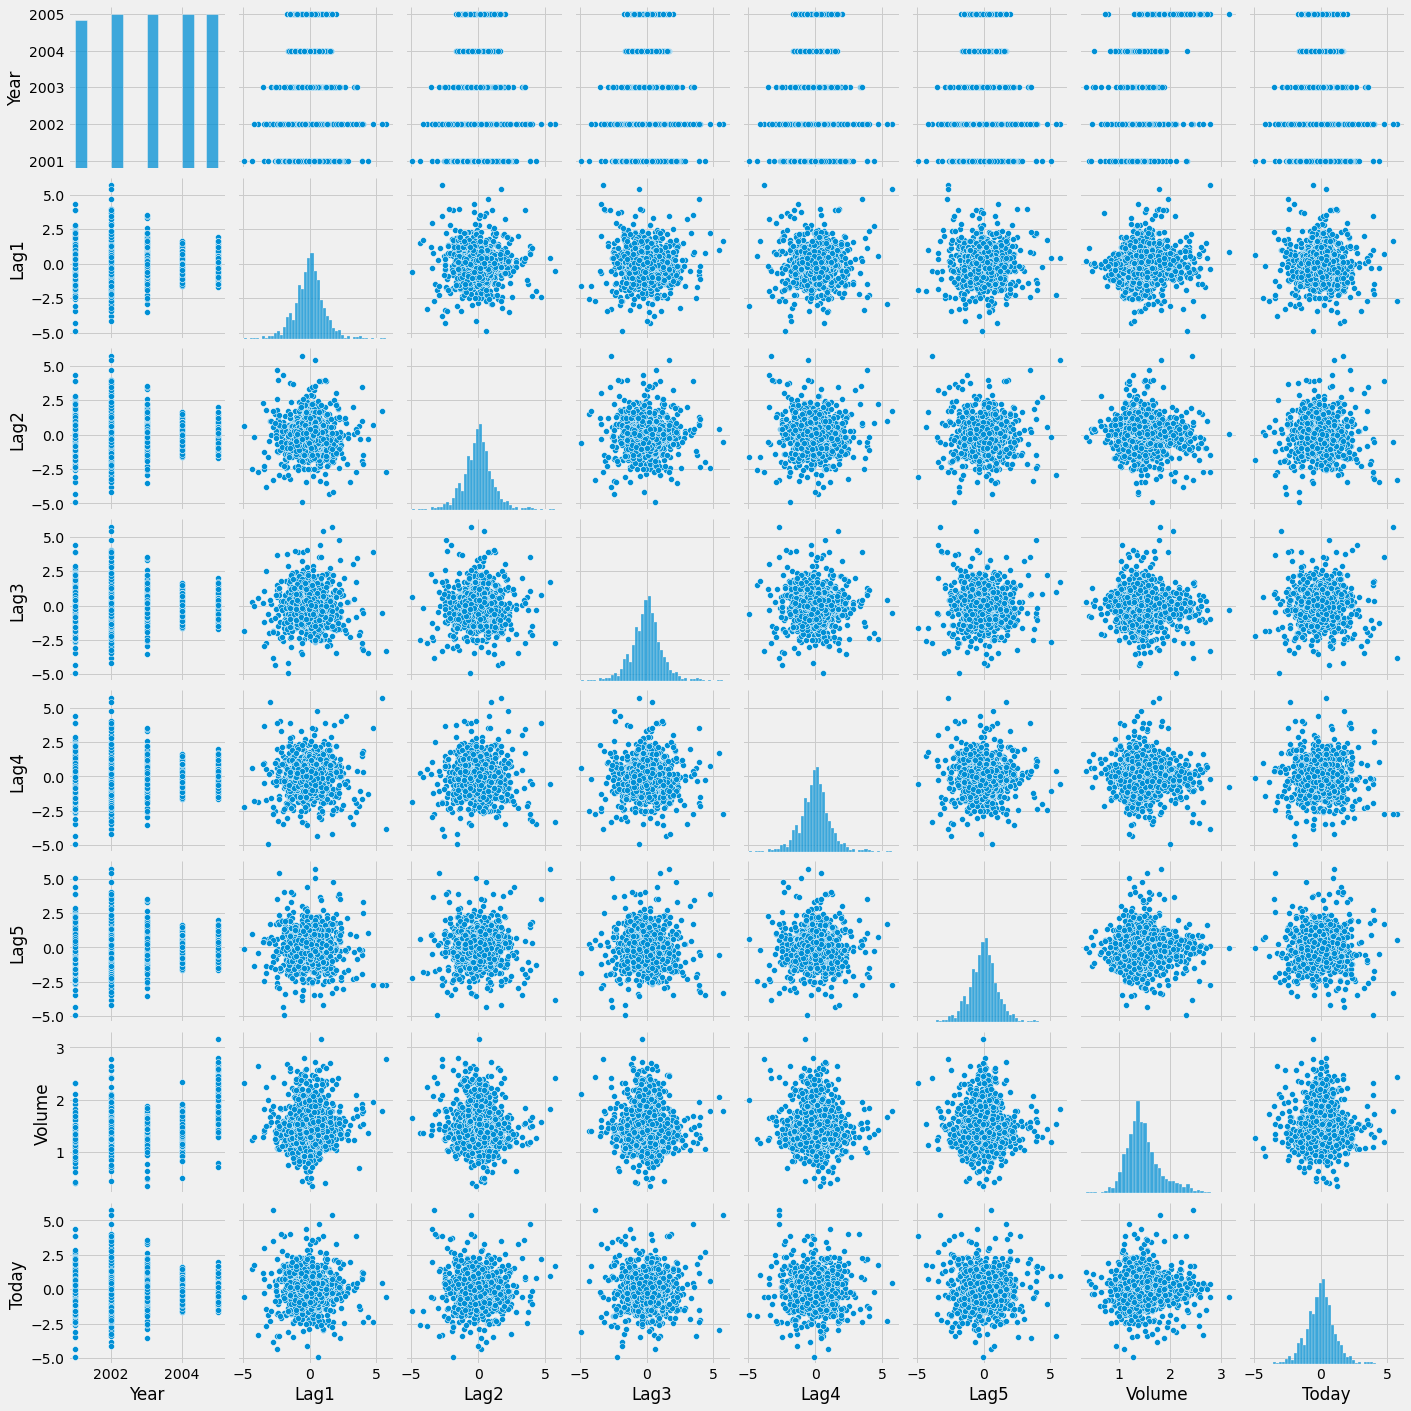

In [4]:
sns.pairplot(df_smarket)

In [5]:
df_smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


# Logistic Regression

In [6]:
y = df_smarket.Direction.map(lambda x: 1 if x == 'Up' else 0)
X = df_smarket.loc[:,['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
X = sm.add_constant(X)
logit_model = sm.Logit(y,X)
results = logit_model.fit(method= 'bfgs')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: Direction        AIC:              1741.5841
Date:               2021-04-01 15:42 BIC:              1777.5004
No. Observations:   1250             Log-Likelihood:   -863.79  
Df Model:           6                LL-Null:          -865.59  
Df Residuals:       1243             LLR p-value:      0.73187  
Converged:          1.0000           Scale:            1.0000   
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.1258     0.2407   -0.5225   0.6014   -0.5976   0.3461
Lag1      -0.0731     0.0502   -1.4566   0.1452   -0.1714   0.0253
Lag2      -0.0423     0.0501   -0.8445   0.3984   -0.1405   0.0559
Lag3       0.0111     0.0499    0.2222   0.8242   -0.0868   0.1090
Lag4       0.0093     0.0500    0.1870   0.8517   -0.0886   0.1073
Lag5       0.0103     0.0495    0.2082   0.8351   -0.0867   0.1073
Volume     0.1353     0.1584    0.8544   0.3929   -0.1751   0.4457
================================================================

"""

In [7]:
results.params

const    -0.125774
Lag1     -0.073076
Lag2     -0.042300
Lag3      0.011094
Lag4      0.009343
Lag5      0.010307
Volume    0.135304
dtype: float64

In [8]:
pred_prob = results.predict(X)
print(type(pred_prob))
pred_prob[0:10]

<class 'pandas.core.series.Series'>


0    0.507090
1    0.481491
2    0.481153
3    0.515237
4    0.510794
5    0.506960
6    0.492660
7    0.509238
8    0.517632
9    0.488845
dtype: float64

In [9]:
classifier = LogisticRegression(penalty='none',solver ='lbfgs',random_state = 1,fit_intercept=False)
clf = classifier.fit(X,y)
print(clf.coef_)

[[-0.12600781 -0.07307339 -0.04230074  0.01108552  0.00935968  0.01031339
   0.13544567]]


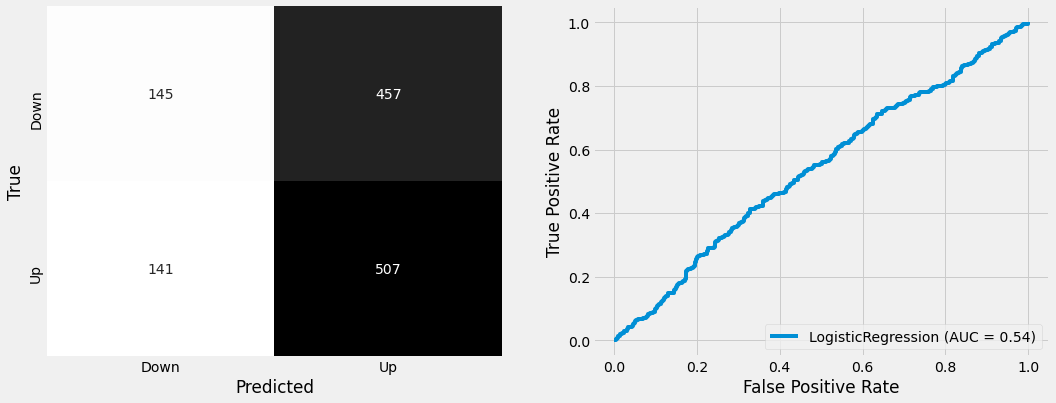

In [10]:
fig,axs = plt.subplots(1,2,figsize = (16,6))
pred_mov = pred_prob.map(lambda x : 'Up' if x > 0.5 else 'Down')
conf_matrix = confusion_matrix(df_smarket.Direction,pred_mov)
sns.heatmap(conf_matrix, cmap = 'binary', ax= axs[0], annot=True,fmt = 'g',xticklabels = ['Down','Up'],yticklabels = ['Down','Up'],
            cbar= False)
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
plot_roc_curve(clf,X,y,ax= axs[1])

plt.show()

## Test and Train

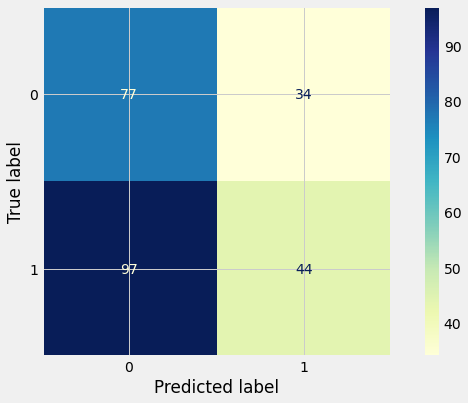

0.4801587301587302


In [11]:
df_train = df_smarket[df_smarket.Year <2005]
df_Smarket = df_smarket[df_smarket.Year == 2005]
df_train.head()
y = df_train.Direction.map(lambda x: 1 if x == 'Up' else 0)
cols_to_select = ['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']
X = df_train.loc[:,cols_to_select]
clf = LogisticRegression(penalty='none',random_state=1,n_jobs=-1)
clf.fit(X,y)
X_test = df_Smarket.loc[:,cols_to_select]
y_test = df_Smarket.Direction.map(lambda x: 1 if x == 'Up' else 0)
fig,axs = plt.subplots(1,1, figsize = (10,6))
plot_confusion_matrix(clf,X_test,y_test,cmap = 'YlGnBu' , ax = axs)
plt.show()
y_test_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_test_pred)
print(accuracy)

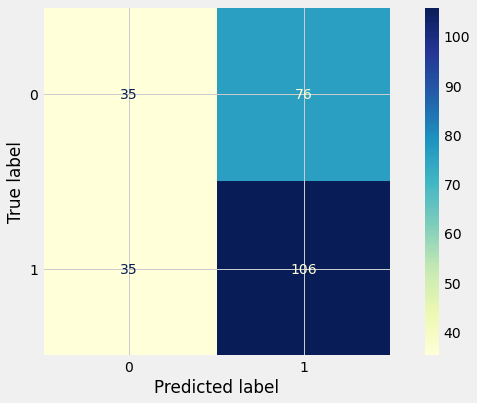

0.5595238095238095


In [12]:
df_train = df_smarket[df_smarket.Year <2005]
df_Smarket = df_smarket[df_smarket.Year == 2005]
df_train.head()
y = df_train.Direction.map(lambda x: 1 if x == 'Up' else 0)
cols_to_select = ['Lag1','Lag2']
X = df_train.loc[:,cols_to_select]
clf = LogisticRegression(penalty='none',random_state=1,n_jobs=-1)
clf.fit(X,y)
X_test = df_Smarket.loc[:,cols_to_select]
y_test = df_Smarket.Direction.map(lambda x: 1 if x == 'Up' else 0)
fig,axs = plt.subplots(1,1, figsize = (10,6))
plot_confusion_matrix(clf,X_test,y_test,cmap = 'YlGnBu' , ax = axs)
plt.show()
y_test_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_test_pred)
print(accuracy)

In [13]:
data_to_predict = pd.DataFrame()
data_to_predict['Lag1'] = [1.2,1.5]
data_to_predict['Lag2'] = [1.1,-0.8]
clf.predict_proba(data_to_predict)

array([[0.52085396, 0.47914604],
       [0.50388891, 0.49611109]])

# Linear Discriminant Analysis

priors [0.49198397 0.50801603]
group means [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
coef [[-0.05544078 -0.0443452 ]]


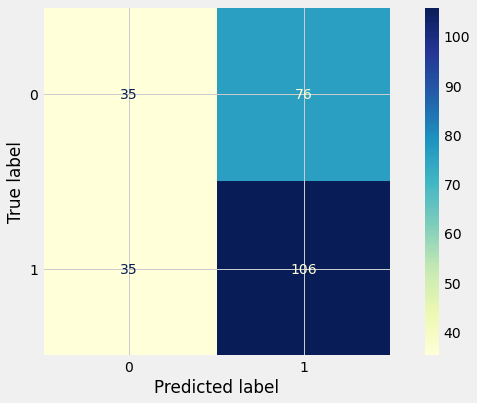

0

In [14]:
df_train = df_smarket[df_smarket.Year <2005]
df_Smarket = df_smarket[df_smarket.Year == 2005]
df_train.head()
y = df_train.Direction.map(lambda x: 1 if x == 'Up' else 0)
cols_to_select = ['Lag1','Lag2']
X = df_train.loc[:,cols_to_select]
clf = LinearDiscriminantAnalysis(store_covariance=True)
clf.fit(X,y)
print('priors',clf.priors_)
print('group means',clf.means_)
print('coef', clf.coef_)
X_test = df_Smarket.loc[:,cols_to_select]
y_test = df_Smarket.Direction.map(lambda x: 1 if x == 'Up' else 0)
fig,axs = plt.subplots(1,1, figsize = (10,6))
plot_confusion_matrix(clf,X_test,y_test,cmap = 'YlGnBu' , ax = axs)
plt.show()

sum(clf.predict_proba(X_test)[:,1] > 0.9)

# Quadratic Discriminant Analysis

priors [0.49198397 0.50801603]
group means [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


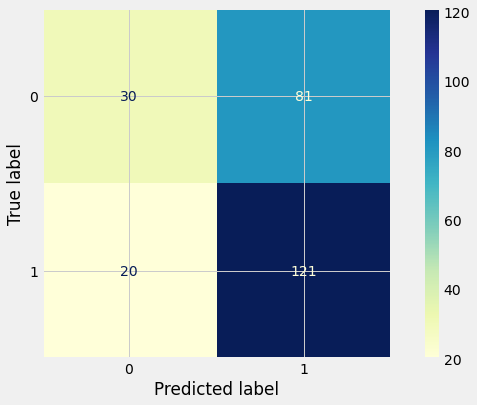

accuracy  0.5992063492063492


In [15]:
df_train = df_smarket[df_smarket.Year <2005]
df_Smarket = df_smarket[df_smarket.Year == 2005]
df_train.head()
y = df_train.Direction.map(lambda x: 1 if x == 'Up' else 0)
cols_to_select = ['Lag1','Lag2']
X = df_train.loc[:,cols_to_select]
clf = QuadraticDiscriminantAnalysis(store_covariance=True)
clf.fit(X,y)
print('priors',clf.priors_)
print('group means',clf.means_)

X_test = df_Smarket.loc[:,cols_to_select]
y_test = df_Smarket.Direction.map(lambda x: 1 if x == 'Up' else 0)
fig,axs = plt.subplots(1,1, figsize = (10,6))
plot_confusion_matrix(clf,X_test,y_test,cmap = 'YlGnBu' , ax = axs)
plt.show()

sum(clf.predict_proba(X_test)[:,1] > 0.9)
print('accuracy ',accuracy_score(y_test,clf.predict(X_test)))

# KNN Implementation

In [51]:
df_carvan = pd.read_csv('Data/Caravan.csv')
df_X = df_carvan.select_dtypes(exclude = ['object'])
df_Y = df_carvan.Purchase
std_scaler = StandardScaler()
df_X = pd.DataFrame(std_scaler.fit_transform(df_X),columns=df_X.columns)
test_X, test_y = df_X.iloc[:1000], df_Y.iloc[:1000]
train_X, train_y = df_X.iloc[1000:], df_Y.iloc[1000:]
clf = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
clf.fit(train_X,train_y)
print(clf.score(test_X,test_y))
display(test_y.value_counts(normalize=True))

0.882


No     0.941
Yes    0.059
Name: Purchase, dtype: float64

In [49]:
test_y.value_counts()

No     941
Yes     59
Name: Purchase, dtype: int64

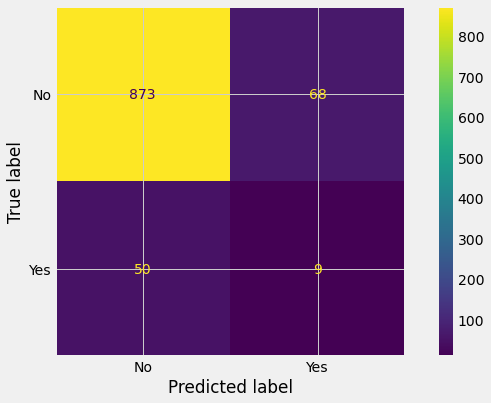

In [47]:
fig,axs = plt.subplots(1,1, figsize =(10,6))
plot_confusion_matrix(clf,test_X,test_y, ax= axs)
plt.show()

In [52]:
df_carvan = pd.read_csv('Data/Caravan.csv')
df_X = df_carvan.select_dtypes(exclude = ['object'])
df_Y = df_carvan.Purchase
std_scaler = StandardScaler()
df_X = pd.DataFrame(std_scaler.fit_transform(df_X),columns=df_X.columns)
test_X, test_y = df_X.iloc[:1000], df_Y.iloc[:1000]
train_X, train_y = df_X.iloc[1000:], df_Y.iloc[1000:]
clf = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
clf.fit(train_X,train_y)
print(clf.score(test_X,test_y))
display(test_y.value_counts(normalize=True))

0.934


No     0.941
Yes    0.059
Name: Purchase, dtype: float64

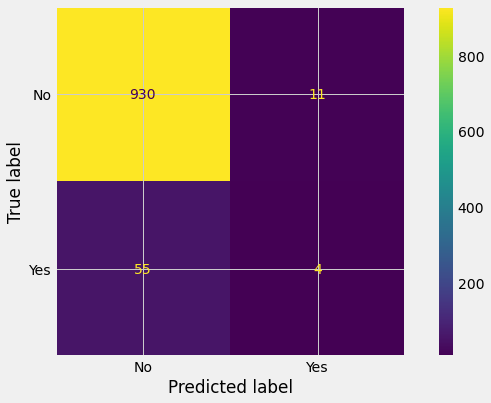

In [53]:
fig,axs = plt.subplots(1,1, figsize =(10,6))
plot_confusion_matrix(clf,test_X,test_y, ax= axs)
plt.show()

In [80]:
test_str = 'oishani'
test_str[-3]

'a'

In [77]:
class Node:
    def __init__(self, dataval=None):
        self.dataval = dataval
        self.nextval = None

class SLinkedList:
    def __init__(self):
        self.headval = None

list1 = SLinkedList()
list1.headval = Node("Mon")
e2 = Node("Tue")
e3 = Node("Wed")
# Link first Node to second node
list1.headval.nextval = e2

# Link second Node to third node
e2.nextval = e3

def print_linked()

In [81]:
600/18.73

32.03416978109984